### Algorithm: CNN-1D including normalization v1
### Dataset: Basic Motions
### Authors: Edgar Acuna  
### Created: April 16, 2025

In [74]:
import tensorflow

In [75]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import tensorflow.keras.layers as layers
import keras
#from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

In [76]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing
from matplotlib import pyplot

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [77]:
# loading Training data
X, y = load_data("BasicMotions",split="Train")

 Shape of X =  (40, 6, 100)
 Shape of y =  (40,)
 New shape of X =  (40, 100, 6)
 New shape of y =  (40, 4)


In [78]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
print(yo)

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0]


In [79]:
X1=X[yo==0]
X2=X[yo==1]
print(X2.shape)

(10, 100, 6)


In [80]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
print(Xa2.shape)

(6, 100)


In [81]:
# loading Testing data
Xt, yt = load_data("BasicMotions",split="Test")

 Shape of X =  (40, 6, 100)
 Shape of y =  (40,)
 New shape of X =  (40, 100, 6)
 New shape of y =  (40, 4)


In [82]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [83]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([10, 10, 10, 10])

In [84]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)
m=X.mean(axis=0)
s=X.std(axis=0)
X=(X-m)/s
Xt=(Xt-m)/s

(80, 100, 6)


In [85]:
import time
#trainX, trainy, testX, testy = trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
#print(trainX.shape)
#print("trainy",trainy.shape)
trainX=X
trainy=y
testX=Xt
testy=yt
verbose, epochs, batch_size = 0, 300, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
print(n_timesteps,n_features,n_outputs)
model = Sequential()
model.add(keras.Input(shape=(n_timesteps,n_features)))
model.add(Conv1D(32, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Conv1D(64, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Conv1D(128, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Conv1D(512, 2, activation="relu",))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation = 'softmax'))
start_time = time.time()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()
model.fit(trainX, trainy, epochs=300, batch_size=32, verbose=1)
#model.fit(xtrain, ytrain, batch_size=256,epochs=25,  validation_split=.2, verbose=1)
acc = model.evaluate(trainX, trainy)
print("Loss:", acc[0], " Accuracy:", acc[1])
print("Training time --- %s seconds ---" % (time.time() - start_time))

100 6 4


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 99, 32)         │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 49, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 48, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 23, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 10, 512)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 5, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 849,700 (3.24 MB)

 Trainable params: 849,700 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.1625 - loss: 1.4217
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2875 - loss: 1.2646
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3312 - loss: 1.1709
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5042 - loss: 1.0425
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3917 - loss: 1.0348
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9229 - loss: 0.8378
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9187 - loss: 0.8072
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.6191
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9292 - loss: 0.5992
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9458 - loss: 0.4110
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9187 - loss: 0.4758
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - lo

In [86]:
model.evaluate(testX, testy, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 4.5793e-04


[0.0004232227220200002, 1.0]

In [87]:
#Computing F1-score
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
train_features = np.array(trainX)
test_features = np.array(testX)
train_labels=np.array(trainy)
#train_labels=pd.DataFrame(trainy)
#n_values = train_labels.idxmax(axis=1)
y_values=np.argmax(train_labels,axis=1)
#print(y_values)
test_labels=np.array(testy)
yt_values=np.argmax(test_labels,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
th=.8
atempo=a.max(axis=1)
print(atempo.shape)
print('Rate of Probability of classification exceeding a threshold in test',(atempo[atempo>th].shape[0])/atempo.shape[0])
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
#print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
#print('Rate of Probability of classification exceding a trhershold',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#f1_train=sklearn.metrics.f1_score(ytrain, train_predictions_baseline, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
#print(test_predictions_baseline)
#f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average="weighted")
#print('f1_scores in testing set',f1_test)
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(yt_values, predict_classes))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_184
Received: inputs=('Tensor(shape=(32, 100, 6))',)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_184
Received: inputs=('Tensor(shape=(None, 100, 6))',)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
(40,)
Rate of Probability of classification exceeding a threshold in test 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [88]:
cm=confusion_matrix(yt_values, predict_classes)
print(cm)
good=np.diag(cm)/np.unique(yt_values,return_counts=True)[1]
print(good)

[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]
[1. 1. 1. 1.]


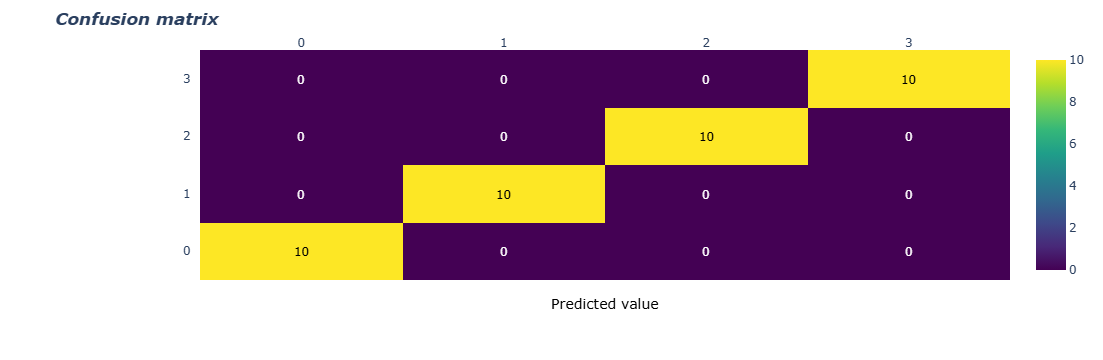

In [89]:
import plotly.figure_factory as ff
# invert z idx values

z= cm

# invert z idx values
#z = z[::-1]

x= [0,1,2,3]
y1=x
#y =x[::-1].copy() # invert idx values of x
#print(y)
#y=x
# change each element of z to type string for annotations
z_text = [[str(y1) for y1 in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=x, y=y1, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Actual value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [90]:
results1=model.evaluate(Xt, yt, verbose=1)
print(results1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 4.5793e-04
[0.0004232227220200002, 1.0]
